## Read .ghg metadata

In [85]:
import preProcessing
import importlib
import time
importlib.reload(preProcessing)
T1 = time.time()

# pr = preProcessing.read_ALL('BB',2022,6,processes=1,Test=2)
for m in range(6,12):
    pr = preProcessing.read_ALL('BBS',2023,m,processes=4,file_type='dat')#,copy_From="X:\\BBS\\EC_Station\\",copy_tag='FLUX')
# pr = preProcessing.read_ALL('BBS',2023,6,Test=4,processes=1,file_type='dat')
T2 = time.time()

print('\n')
print('Runtime: ',(T2-T1)/60,' minutes')




Runtime:  0.0284736434618632  minutes


In [82]:

bearing = 140
width = 30
mn_mx = [bearing+180-width,bearing+180+width]
if mn_mx[0] <= 360 and mn_mx[1] <= 360:
    filters=mn_mx
elif mn_mx[0] > 360 and mn_mx[1] > 360:
    filters=[mn_mx[0]-360,mn_mx[1]-360]
else:
    filters=[mn_mx[0],360,0,mn_mx[1]-360]
print(filters)

[60, 120]


In [10]:
import setupEP as eP
import importlib
import time
importlib.reload(eP)

########## Note - incomplete ghg or biomet files can crash program (preprocessing procedures should help prevent that by re-naming incomplete files)

T1 = time.time()
mR = eP.makeRun('ep_Templates/DefaultSettings.eddypro','BBS','test',Processes=6,priority = 'high priority')
D = []
# for i in range(12,15):
    # print(i)2023-07-13 2100
mR.runDates(['2023-06-14 00:00','2023-12-15 23:59'])
T2 = time.time()
print('\n')
print('Runtime: ',(T2-T1)/60)

Splitting into 2 batches due to update metadata
Running EddyPro[████████████████████████████████████████████████████████████] 12/12

Runtime:  58.52033663988114


In [47]:
dout = mR.output_path+'eddypro_test_BBS_full_output_2024-02-14T1935_adv.csv'
import pandas as pd
df = pd.read_csv(dout,skiprows=[0,2],na_values=-9999,parse_dates={'TIMESTAMP':['date','time']},index_col='TIMESTAMP')
df[['H','LE','co2_flux']].describe()

mout = mR.output_path+'eddypro_test_BBS_biomet_2024-02-14T1935_adv.csv'

bm = pd.read_csv(mout,skiprows=[1],na_values=-9999,parse_dates={'TIMESTAMP':['date','time']},index_col='TIMESTAMP')

df = pd.concat([df,bm[['RH_1_1_1','canopy_height','Ta_1_1_1','Rg_1_1_1','LWIN_1_1_1']]],axis=1)

count    2419.000000
mean       -6.204410
std         9.103856
min       -66.868200
25%       -12.159250
50%        -7.743760
75%        -1.805355
max       101.946000
Name: co2_flux, dtype: float64

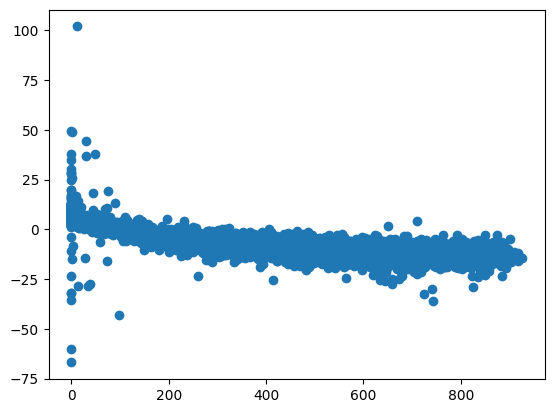

In [55]:
import matplotlib.pyplot as plt
import numpy as np


# df[['Rg_1_1_1','co2_flux']].sort_index()
df.loc[df['qc_co2_flux']>0,'co2_flux']=np.nan
df.loc[df['u*']<0.2,'co2_flux']=np.nan

plt.scatter(df['Rg_1_1_1'],df['co2_flux'])\

df['co2_flux'].describe()

# Speedtests

All times in minutes

### 4 threads (8 timesteps each)

Normal priority: 2.05
High priority: 1.91

### 4 threads (48 timesteps each x 12 days)

High priority: 29

### Eddypro GUI (1 run [12 days, 576 timesteps])

High priority: 90